DataFrames have about 211 public methods or attritubes (`len([x for x in dir(pd.DataFrame) if not x.startswith('_')])`). That's a lot.

In [31]:
len([x for x in dir(pd.DataFrame) if not x.startswith('_')])

211

In [19]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm

In [16]:
url = "http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF2-2.csv"
df = (pd.read_csv(url)
        .assign(ln_gas_pp = lambda x: np.log(x.GASEXP / x.POP),
                ln_price = lambda x: np.log(x.GASP),
                ln_inc_pp = lambda x: np.log(x.INCOME / x.POP),
                ln_price_new = lambda x: np.log(x.PNC),
                ln_price_used = lambda x: np.log(x.PUC),
                ln_gas_pp_lag = lambda x: np.log(x.GASEXP.shift() /
                                                 x.POP.shift())))

In [23]:
formula = ('ln_gas_pp ~ ln_price + ln_inc_pp + ln_price_new'
           ' + ln_price_used + ln_gas_pp_lag')
mod = sm.OLS.from_formula(formula, df)
res = mod.fit()
res.params

Intercept       -3.441031
ln_price         0.655366
ln_inc_pp        1.230164
ln_price_new    -0.128413
ln_price_used   -0.089810
ln_gas_pp_lag    0.389529
dtype: float64

So my first rule is do as much preprocessing as possible the time of data import. It's a bit like Ned Batchelder's [utf-8 sandwich](http://nedbatchelder.com/text/unipain/unipain.html#35). Do all the messy stuff at IO time. Create a nice clean environment for your work.

This includes:

- data type handling (especially dates)
- column renaming (make everything valid python identifiers)
- feature extraction

Feature extraction is just a fancy machine learning term for deriving new features from existing ones. In my example above the data types are all inferred correctly by pandas, and the columns are good enough (although some of the names are cryptic). The biggest thing is feature extraction.

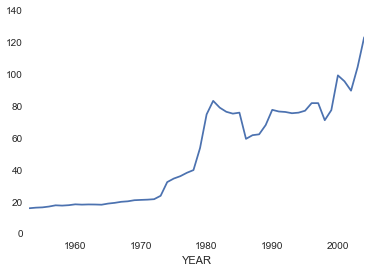

In [38]:
df.plot(x='YEAR', y='GASP', legend=None);

In [37]:
mod = sm.OLS.from_formula(formula, df.query('YEAR > 1982'))
res = mod.fit()
res.params

Intercept       -11.016245
ln_price          0.959616
ln_inc_pp         0.784518
ln_price_new      0.128530
ln_price_used     0.104460
ln_gas_pp_lag     0.007711
dtype: float64

In [39]:
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/UScrime.csv')

In [40]:
df

,Unnamed: 0,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
0,1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
1,2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
2,3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
3,4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
4,5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
5,6,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682
6,7,127,1,111,82,79,519,982,4,139,97,38,620,168,0.042100,20.6993,963
7,8,131,1,109,115,109,542,969,50,179,79,35,472,206,0.040099,24.5988,1555
8,9,157,1,90,65,62,553,955,39,286,81,28,421,239,0.071697,29.4001,856
9,10,140,0,118,71,68,632,1029,7,15,100,24,526,174,0.044498,19.5994,705
